# 機器學習百日馬拉松Day10

[作業目標]
請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果
思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data-Part01/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
#將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
# 觀察相關係數，預設為pearson相關
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


列出相關係數前15名及後15名

In [11]:
#因為Target和自己的相關係數為1，所以取前16名
CorrTop15 = app_train.corr()['TARGET'].sort_values(ascending=False).head(16)
CorrTop15

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

In [12]:
CorrLast15 = app_train.corr()['TARGET'].sort_values().head(15)
CorrLast15

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [24]:
# 觀察相關係數，使用kendall tau 相關
kendall_Corr = app_train.corr(method='kendall')['TARGET']
kendall_Corr

SK_ID_CURR                    -0.001724
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019405
AMT_INCOME_TOTAL              -0.015177
AMT_CREDIT                    -0.014368
AMT_ANNUITY                   -0.000060
AMT_GOODS_PRICE               -0.026102
REGION_POPULATION_RELATIVE    -0.025233
DAYS_BIRTH                    -0.063957
DAYS_EMPLOYED                  0.065548
DAYS_REGISTRATION              0.032801
DAYS_ID_PUBLISH                0.042899
OWN_CAR_AGE                    0.044123
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.006529
REGION_RATING_CLIENT           0.057178
REGION_RATING_CLIENT_W_CITY    0.059154


In [25]:
kendall_Corrtop15 = kendall_Corr.sort_values(ascending=False).head(16)
kendall_Corrtop15

TARGET                         1.000000
DAYS_EMPLOYED                  0.065548
REGION_RATING_CLIENT_W_CITY    0.059154
REGION_RATING_CLIENT           0.057178
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_LAST_PHONE_CHANGE         0.044158
OWN_CAR_AGE                    0.044123
DAYS_ID_PUBLISH                0.042899
DAYS_REGISTRATION              0.032801
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.031900
DEF_60_CNT_SOCIAL_CIRCLE       0.030734
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

In [26]:
kendall_Corrlast15 = kendall_Corr.sort_values().head(15)
kendall_Corrlast15

EXT_SOURCE_3         -0.135980
EXT_SOURCE_1         -0.123396
EXT_SOURCE_2         -0.120298
DAYS_BIRTH           -0.063957
DAYS_EMPLOYED_ANOM   -0.045987
FLOORSMAX_MEDI       -0.041140
FLOORSMAX_AVG        -0.041074
FLOORSMAX_MODE       -0.040774
ELEVATORS_AVG        -0.035479
ELEVATORS_MEDI       -0.035240
LIVINGAREA_AVG       -0.034001
ELEVATORS_MODE       -0.033955
LIVINGAREA_MEDI      -0.033600
TOTALAREA_MODE       -0.032727
LIVINGAREA_MODE      -0.031902
Name: TARGET, dtype: float64

選擇相關係數最高和最低的變數觀察

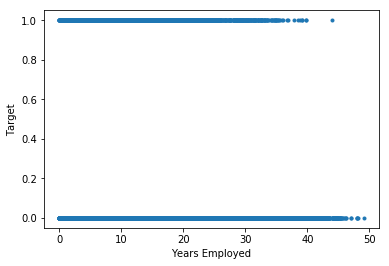

In [29]:
#利用Days of Employed和target作圖
plt.plot(app_train['DAYS_EMPLOYED']/(-365), app_train['TARGET'], '.')
plt.xlabel('Years Employed')
plt.ylabel('Target')
plt.show()

In [8]:
# 因為散佈圖看不出關係，做成boxplot，要先填入空值，並新增一個欄位為受雇年數
app_train['YEARS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].fillna(0) / (-365)

Text(0.5, 1.0, '')

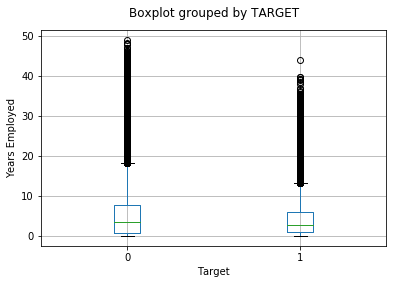

In [31]:
#產出boxplot
fig,axes = plt.subplots()
app_train.boxplot(column='YEARS_EMPLOYED',by=['TARGET'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('Years Employed')
axes.set_xlabel('Target')
axes.set_title('')

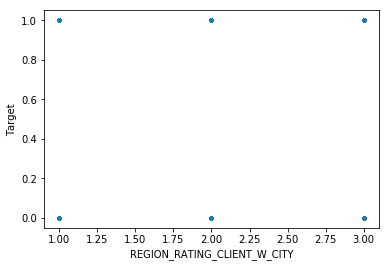

In [21]:
#利用REGION_RATING_CLIENT_W_CITY和target作圖
plt.plot(app_train['REGION_RATING_CLIENT_W_CITY'], app_train['TARGET'], '.')
plt.xlabel('REGION_RATING_CLIENT_W_CITY')
plt.ylabel('Target')
plt.show()

In [27]:
#圖形看不出來，用聚合運算看出次數
counttotal = app_train.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].count()
count1 = app_train.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].sum()
count0 = counttotal - count1
print('三種分數的總個數', counttotal)
print('三種分數在Target為1的比較', count1)
print('三種分數在Target為0的比較', count0)

三種分數的總個數 REGION_RATING_CLIENT_W_CITY
1     34167
2    229484
3     43860
Name: TARGET, dtype: int64
三種分數在Target為1的比較 REGION_RATING_CLIENT_W_CITY
1     1654
2    18170
3     5001
Name: TARGET, dtype: int64
三種分數在Target為0的比較 REGION_RATING_CLIENT_W_CITY
1     32513
2    211314
3     38859
Name: TARGET, dtype: int64


In [28]:
#哪一個分數的區域Target=1的佔比較高
count_per = count1 / counttotal
print('三種分數在Target=1的占比', count_per)

三種分數在Target為0的比較 REGION_RATING_CLIENT_W_CITY
1    0.048409
2    0.079178
3    0.114022
Name: TARGET, dtype: float64


該區域得到的分數越高，得到target=1的機率較高

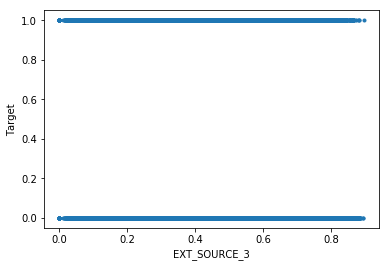

In [28]:
#利用EXT_SOURCE_3和target作圖
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Target')
plt.show()

Text(0.5, 1.0, '')

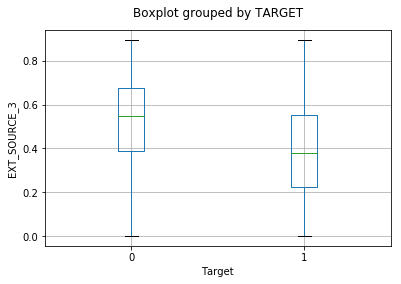

In [32]:
#產出boxplot
fig,axes = plt.subplots()
app_train.boxplot(column='EXT_SOURCE_3',by=['TARGET'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('EXT_SOURCE_3')
axes.set_xlabel('Target')
axes.set_title('')

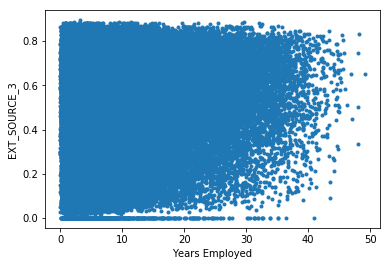

In [27]:
#用Days Employed 和 EXT_SOURCE_3來畫圖觀察
plt.plot(app_train['DAYS_EMPLOYED']/ -365, app_train['EXT_SOURCE_3'], '.')
plt.xlabel('Years Employed')
plt.ylabel('EXT_SOURCE_3')
plt.show()